<a href="https://colab.research.google.com/github/Rafey4488/Machine-Learning-Models/blob/main/Used%20cars%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LINEAR REGRESSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/ML Dataset/Project dataset/car data.csv')

In [ ]:
Data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df = pd.DataFrame(Data)
df.dropna(inplace= True)
Year = df.Year
Age= 2019 * (np.ones(df.Year.size)) - Year # The year of cars is calculated from 2018.
df.drop(['Car_Name'], axis=1, inplace= True)
df.drop(['Year'], axis=1, inplace= True)
df.insert(0, 'Age', Age)

In [ ]:
df

,Age,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,5.0,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6.0,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2.0,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8.0,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5.0,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3.0,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4.0,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10.0,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2.0,11.50,12.50,9000,Diesel,Dealer,Manual,0


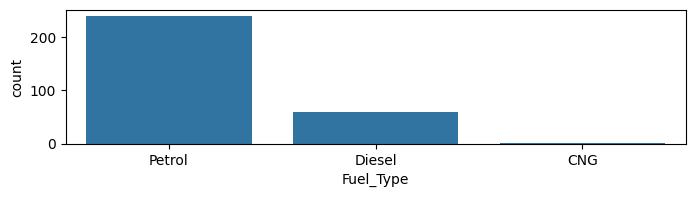

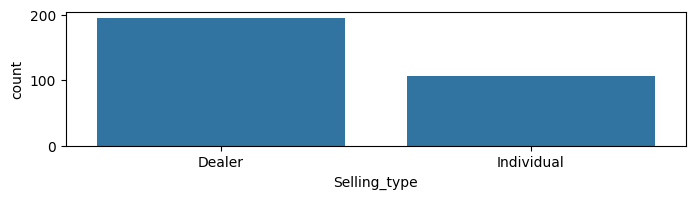

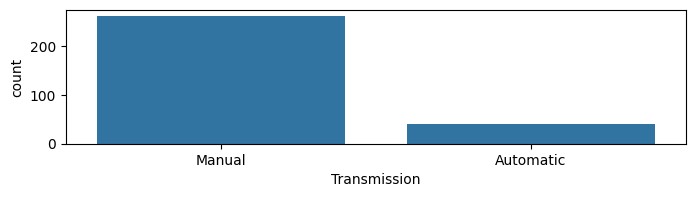

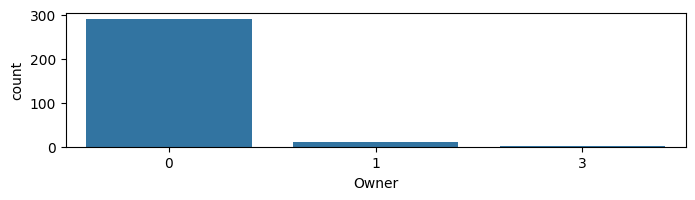

In [ ]:
col_name = ['Fuel_Type','Selling_type','Transmission','Owner']

for i in range(1,5):
  plt.figure(figsize=(8,8))
  plt.subplot(4,1,i)
  sns.countplot(x=df[col_name[i-1]],data = df)
  plt.show()


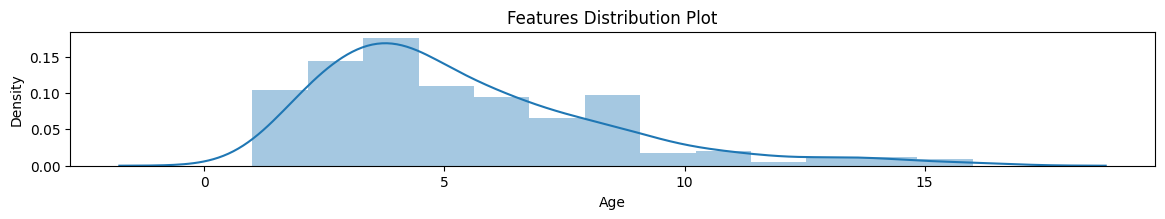

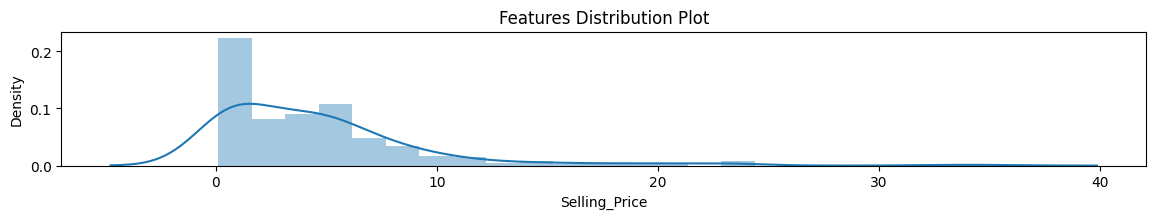

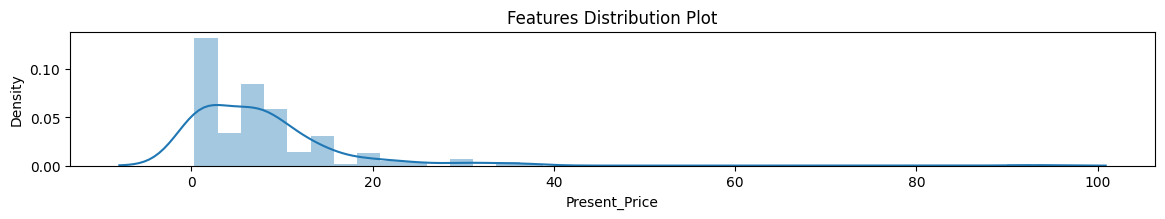

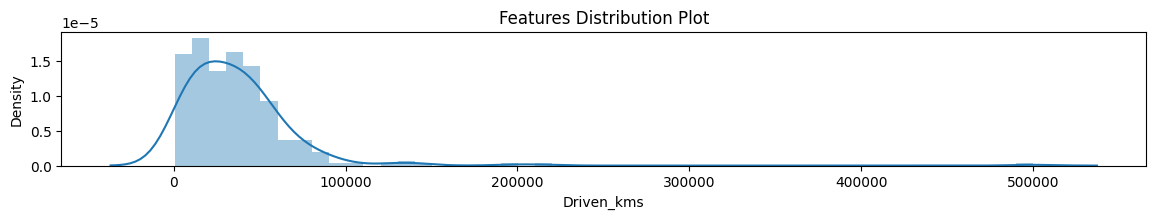

In [ ]:
columns=['Age','Selling_Price','Present_Price','Driven_kms']

for i in range(1,5):
    plt.figure(figsize=(14,8))
    plt.subplot(4,1,i)
    plt.title('Features Distribution Plot')
    sns.distplot(df[columns[i-1]])
    plt.show()

In [ ]:
df['Fuel_Type'].replace({'Petrol':2, 'Diesel':3, 'CNG':4}, inplace=True)
df['Selling_type'].replace({'Dealer':2, 'Individual':3}, inplace=True)
df['Transmission'].replace({'Manual':2, 'Automatic':3}, inplace=True)
df

,Age,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,5.0,3.35,5.59,27000,2,2,2,0
1,6.0,4.75,9.54,43000,3,2,2,0
2,2.0,7.25,9.85,6900,2,2,2,0
3,8.0,2.85,4.15,5200,2,2,2,0
4,5.0,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...
296,3.0,9.50,11.60,33988,3,2,2,0
297,4.0,4.00,5.90,60000,2,2,2,0
298,10.0,3.35,11.00,87934,2,2,2,0
299,2.0,11.50,12.50,9000,3,2,2,0


In [ ]:
X= pd.DataFrame(df, columns=['Age','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner'])
y= df['Selling_Price'].values.reshape(-1,1)

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# work on Minmax Scaler pre processing scale down in a range
# Here we are fiting scaler on training data
norm = MinMaxScaler().fit(x_train)
# transform training data
x_train_norm = norm.transform(x_train)
X_norm=norm.transform(X)
# transform testing dataa
x_test_norm = norm.transform(x_test)

In [ ]:
model= LinearRegression()
# Train model
model.fit(x_train_norm, y_train)

# Test model
result= model.score(x_test_norm, y_test)
y_pred= model.predict(x_test_norm)
print("ACCurecy Score: ", result)

ACCurecy Score:  0.9133788577646784


In [ ]:
#A non-negative floating point value metrices.mean
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Absolute Error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
#R2 coefficient of determination regression score function.
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.0001532823526036
Mean Squared Error: 2.189550207203483
Root Mean Absolute Error: 1.0000766382395918
R2 score: 0.9133788577646784


In [ ]:
columns = ['Selling_Price','Present_Price','Kms_Driven','Age']
df1 = pd.DataFrame(df, columns=columns)

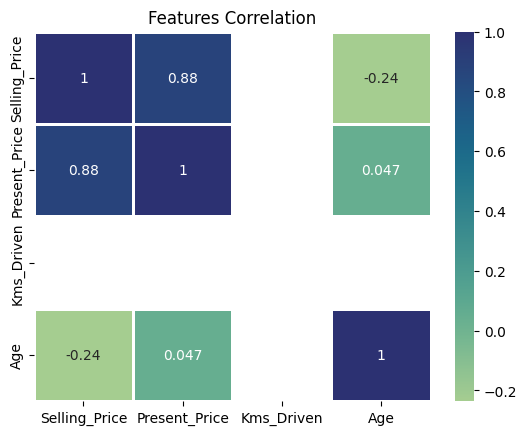

In [ ]:
sns.heatmap(df1.corr(),annot=True,lw=1, linecolor='white', cmap="crest")
plt.title('Features Correlation')
plt.show()

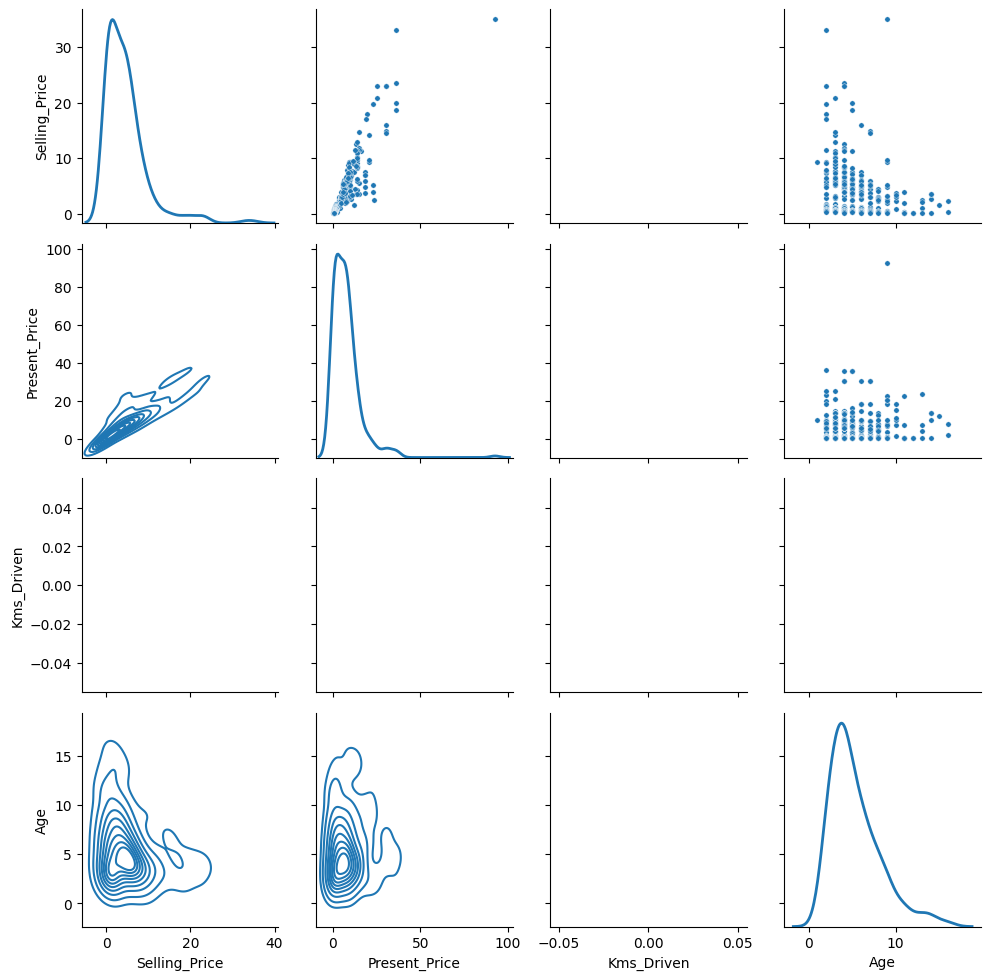

In [ ]:
g = sns.PairGrid(df1, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
#sns.pairplot(df1)
plt.show()

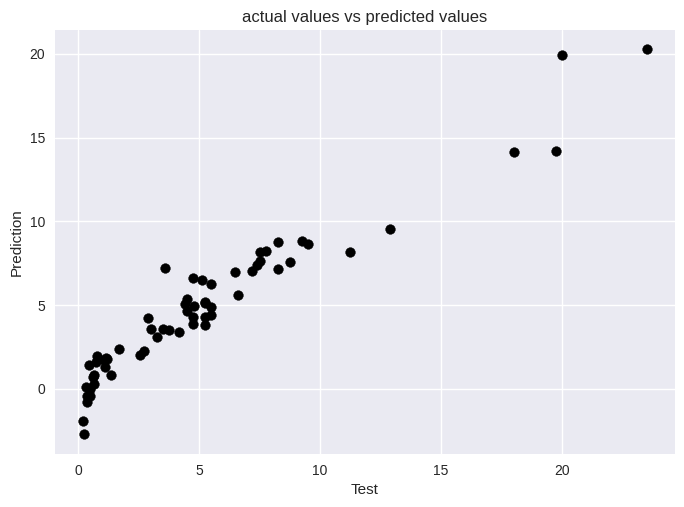

In [ ]:
plt.style.use('seaborn')
plt.scatter(y_test, y_pred, color='black')
plt.xlabel ("Test")
plt.ylabel ("Prediction")
plt.title("actual values vs predicted values")
plt.show()

# ALL MODELS

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred1 = linear_reg.predict(x_test)
print("Accuracy Training: ", linear_reg.score(x_train, y_train))
print("Accuracy Testing: ", linear_reg.score(x_test, y_test))

Accuracy Training:  0.8680830940612679
Accuracy Testing:  0.9133788577646789


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Square Error:", rmse)

Mean Absolute Error: 1.0001532823526018
Mean Squared Error: 2.1895502072034736
Root Mean Square Error: 1.4797128799883692


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr_reg = RandomForestRegressor()
rfr_reg.fit(x_train, y_train)
y_pred2 = rfr_reg.predict(x_test)
print("Accuracy Training: ", rfr_reg.score(x_train, y_train))
print("Accuracy Testing: ", rfr_reg.score(x_test, y_test))

Accuracy Training:  0.9855051495651066
Accuracy Testing:  0.9618648450203481


In [ ]:
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Square Error:", rmse)

Mean Absolute Error: 0.6013327868852458
Mean Squared Error: 0.96395446114754
Root Mean Square Error: 0.9818118257321715


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(x_train, y_train)
y_pred3 = knn.predict(x_test)

# accuracy = knn.score(x_train, y_train)
# print("Accuracy Testing :", accuracy)
print("Accuracy Training: ", knn.score(x_train, y_train))
print("Accuracy Testing: ", knn.score(x_test, y_test))


Accuracy Training:  0.9665881865946382
Accuracy Testing:  0.8737551917177414


In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsRegressor

# scaler = StandardScaler()

# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# knn = KNeighborsRegressor(n_neighbors=3)

# knn.fit(x_train, y_train)


# train_accuracy = knn.score(x_train, y_train)
# test_accuracy = knn.score(x_test, y_test)

# print("Accuracy Training (after scaling):", train_accuracy)
# print("Accuracy Testing (after scaling):", test_accuracy)


Accuracy Training (after scaling): 0.9665881865946382
Accuracy Testing (after scaling): 0.8737551917177414


In [ ]:
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Square Error:", rmse)

Mean Absolute Error: 1.038415300546448
Mean Squared Error: 3.1911302367941707
Root Mean Square Error: 1.7863734874863573


In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(x_train, y_train)

ridge_reg.score(x_train, y_train)

0.847682912692434

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)
print("Acuuraccy training", regressor.score(x_train, y_train))
print("Acuuraccy testing", regressor.score(x_test, y_test))


Acuuraccy training 1.0
Acuuraccy testing 0.9405784917705307


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score

base_regressor = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(base_estimator=base_regressor, n_estimators=100, random_state=42)
bagging_regressor.fit(x_train, y_train)

train_accuracy = bagging_regressor.score(x_train, y_train)
test_accuracy = bagging_regressor.score(x_test, y_test)
print("Accuracy on training set:", train_accuracy)
print("Accuracy on testing set:", test_accuracy)

predictions = bagging_regressor.predict(x_test)

r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

Accuracy on training set: 0.9857129764685645
Accuracy on testing set: 0.9605813624541605
R^2 Score: 0.9605813624541605


# **TESTING ACCURACY**

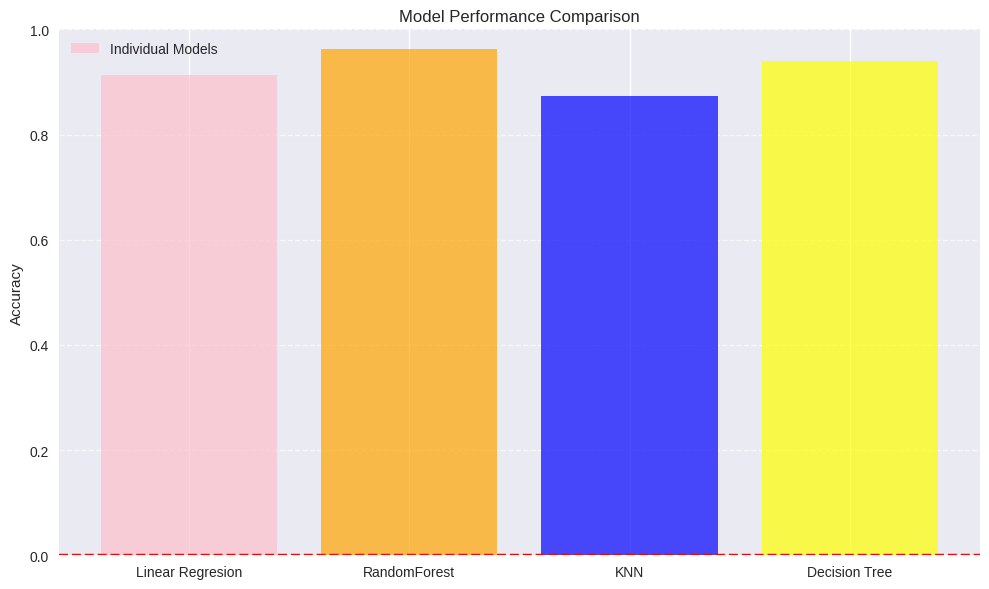

In [ ]:
import matplotlib.pyplot as plt
individual_model_scores = [linear_reg.score(x_test, y_test),
                           rfr_reg.score(x_test, y_test),
                           knn.score(x_test, y_test),
                           regressor.score(x_test, y_test)]
model_names = ['Linear Regresion', 'RandomForest', 'KNN', 'Decision Tree']
plt.figure(figsize=(10, 6))
plt.bar(model_names, individual_model_scores, color=['pink', 'orange', 'blue', 'yellow'], alpha=0.7, label='Individual Models')
plt.axhline(color='red', linestyle='--')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
